# Exercises

## Regression

* [Linear Regression](#1.)
* [Support Vector Regression](#2.)


## Classification

* [K-Nearest Neighbour (KNN) Classification](#3.)
* [Support Vector Machine (SVM) Classification](#4.)


## Clustering

* [K-Means Clustering](#5.)


## Other Content

* [Principal Component Analysis (PCA)](#6.)

# Exercise 1: Regression
<a class="anchor" id="1."></a> 
## Linear Regression

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [258]:
data= pd.read_csv("../data/linear-regression-dataset.csv") 

### 1. Print info and first 5 rows

- Expected output:
```python
>>> <class 'pandas.core.frame.DataFrame'>
>>> RangeIndex: 14 entries, 0 to 13
>>> Data columns (total 2 columns):
>>>  #   Column   Non-Null Count  Dtype  
>>> ---  ------   --------------  -----  
>>> 0   experience  14 non-null     float64
>>> 1   salary      14 non-null     int64  
>>> dtypes: float64(1), int64(1)
>>> memory usage: 352.0 bytes
>>> None
>>>   experience  salary
>>> 0      0.5  2500
>>> 1      0.0  2250
>>> 2      1.0  2750
>>> 3      5.0  8000
>>> 4      8.0  9000
```

In [259]:
print(data.info())
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experience  14 non-null     float64
 1   salary      14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes
None


,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


### 2. Plot deneyim data

- Expected output:
![experience1](../data/experience1.png)

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data['experience'].values, data['salary'].values,color='blue')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

KeyError: 'experience'

### 3. Compute the score and correlation using the `LinearRegression` model

- Expected output:

```Python
>>> R sq:  0.9775283164949902
>>> Correlation:  0.9887003168275967
```

In [266]:
x=np.array(data['experience'].values).reshape((-1, 1))
y=np.array(data['salary'].values)

#Running the regression model 
regression = LinearRegression()
regression.fit(x, y)
y_New= regression.predict(x)
#Computing the score
R_sq = regression.score(x, y) #method 1
print('R sq:', R_sq)
#Computing correlation 
Correlation=data.corr()
print('Correlation:', Correlation)

R sq: 0.9775283164949903
Correlation:             experience  salary
experience      1.0000  0.9887
salary          0.9887  1.0000


### 4. Predict the result of x = 11
- Expected output:

```Python
>>> Coefficient for X:  [[1138.34819698]]
>>> Intercept for X:  [1663.89519747]
>>> Regression line is: y = 1663.895197474103 + (x * 1138.3481969755721)
>>> Value of y is: 14181
>>> The predicted value y is: [[14185.72536421]]
```

In [262]:
print(x) #the training values are not equal to 11, therefore we will create a new independent value 

[[ 0.5]
 [ 0. ]
 [ 1. ]
 [ 5. ]
 [ 8. ]
 [ 4. ]
 [15. ]
 [ 7. ]
 [ 3. ]
 [ 2. ]
 [12. ]
 [10. ]
 [14. ]
 [ 6. ]]


In [263]:
x_new = np.array(11).reshape((-1, 1))
y_new = regression.predict(x_new)
print('Coefficient for X:', regression.coef_)
print('Intercept for X:', regression.intercept_)
print('Regression line is : y=',regression.intercept_,'+ (x*',regression.coef_,')')
print('Value of y is: 14181')
print('The predicted value y is:', y_new)

Coefficient for X: [1138.34819698]
Intercept for X: 1663.8951974741067
Regression line is : y= 1663.8951974741067 + (x* [1138.34819698] )
Value of y is: 14181
The predicted value y is: [14185.72536421]


### 5. Plot both y_head (predicted values) and deneyim data
- Input:
```python
>>> # visualize line
>>> array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # deneyim
```

- Expected output:
    
![experience2](../data/experience2.png)

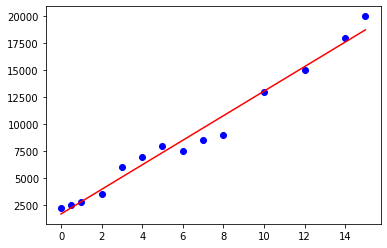

In [264]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)
y_head= regression.predict(array)
plt.scatter(data['experience'].values, data['salary'].values,color='blue')
plt.plot(array,y_head,color='red')
plt.scatter 
plt.show()

### 6. Predict values of deneyim input data and compute the r square score using `r2_score()` function

- Expected output:
```python
>>> r_square score:  0.9775283164949902
```

In [269]:
from sklearn.metrics import mean_squared_error, r2_score
print('r_square score: %.2f'
      % r2_score(y, y_New))

r_square score: 0.98



<a class="anchor" id="2."></a> 
# Support Vector Regression

In [22]:
import matplotlib.pyplot as plt
from sklearn import svm

In [415]:
salary_data= pd.read_csv("../data/salary.csv")

### 1. Print info and first 5 rows

In [416]:
salary_data.info()
salary_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            10 non-null     object
 1   Education level  10 non-null     int64 
 2   salary           10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


,title,Education level,salary
0,Cayci,1,2250
1,Secretary,2,2500
2,Assistant Specialist,3,3000
3,Expert,4,4000
4,Project manager,5,5500


### 2.  Plot the salary over the education level

- Expected output:

![salary1](../data/salary1.png)

### 3. Compute the score using `SVR` model (rbf as kernel), and plot the predicted values

- Expected output:

![salary1](../data/salary2.png)

```python
>>> R sq:  0.7513836788854973
```

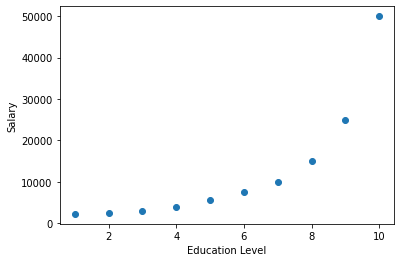

In [417]:
plt.scatter(salary_data['Education level'].values, salary_data['salary'].values)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

In [418]:
X= np.array(salary_data['Education level'].values).reshape(-1,1)
Y= np.array(salary_data['salary'].values)
classifier=svm.SVC(kernel='rbf')
classifier.fit(X,Y)
Y_predict = classifier.predict(X)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y, Y_predict))

Accuracy: 1.0


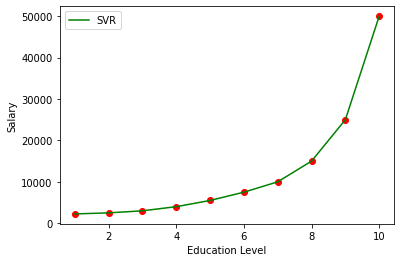

In [419]:
#Plotting the results 
plt.plot(X,Y_predict,color='green', label='SVR' )
plt.scatter(salary_data['Education level'].values, salary_data['salary'].values, color='red')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Classification
<a class="anchor" id="3."></a> 
# K-Nearest Neighbour (KNN) Classification

In [3]:
from sklearn.cluster import KMeans
import pandas as pd

In [4]:
data= pd.read_csv("../data/data-classification.csv")
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### 1. Drop the `id` and `Unnamed: 32` columns 

In [6]:
data=data.drop(['id','Unnamed: 32'],axis=1)

KeyError: "['id' 'Unnamed: 32'] not found in axis"

### 2. Plot `texture_mean` over `radius_mean` for both benign and malignant diagnosis

- Expected output:
![radius](../data/radius.png)

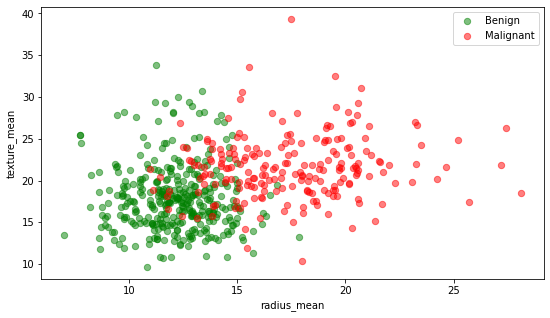

In [9]:
Benign= data.loc[data['diagnosis']=='B']
Malignant=data.loc[data['diagnosis']=='M']
# Visualising the clusters
plt.figure(figsize=(9,5))
plt.scatter(Benign['radius_mean'].values,Benign['texture_mean'].values, color = 'green', alpha=0.5,label = 'Benign',s=40)
plt.scatter(Malignant['radius_mean'].values,Malignant['texture_mean'].values, color = 'red',alpha=0.5, label = 'Malignant',s=40)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()

### 3. Comment the code below

> First we turn the values of the diagnosis column into binary data, by affecting 1 to the value M and 0 to B. 
> Then we attribute the binary diagnosis column values to an array named y.
> Afterwards, we drop the diagnosis column and normalize the values of the remaining columns and atrribute it to x


In [10]:
# %%
import numpy as np
data['diagnosis'] = [1 if each == "M" else 0 for each in data.diagnosis]
y = data['diagnosis'].values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 4. Split your data into train and test subsets using `train_test_split()` (30% for testing)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 5. KNeighborsClassifier model
    a. Comment the code below
- Input:
```python
# knn model
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
>>> knn.fit(x_train,y_train)
>>> prediction = knn.predict(x_test)
>>> print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))
```
>The value to be predicted is y, we want to classify it based on the values of x.
> First we set the number of K neighbors to 3. 
> Then, by using the sklearn  KNeighborsClassifier model we will find the 3 nearest data points to the variable y. 
> Then we will assign it to the category with the most neighbors.
> We test the classifier on the testing datasets and we will assess the classifier's score.
 

    b. Use the previous code to find the best k value
    
        - Expected ouput:
![kvalue](../data/kvalues.png)
    
    c. Use the best k value and compute the score
        - Expected ouput:

```python
>>>  3 nn score: 0.9649122807017544 
```

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9707602339181286 


Text(0, 0.5, 'Accuracy')

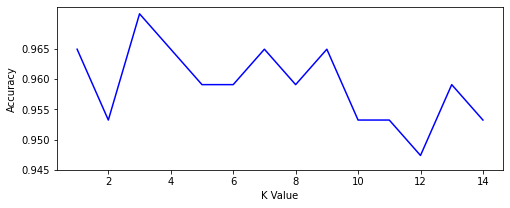

In [13]:
Accuracy= []
# Calculating error for K values between 1 and 40
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    Accuracy.append(knn.score(x_test,y_test))
plt.figure(figsize=(8, 3))
plt.plot(range(1, 15), Accuracy, color='blue')
plt.xlabel('K Value')
plt.yticks([0.945,0.950, 0.955,0.960,0.965])
plt.ylabel('Accuracy')

### Plot the confusion matrix

- Expected output:
![matrix](../data/confusion-matrix.png)

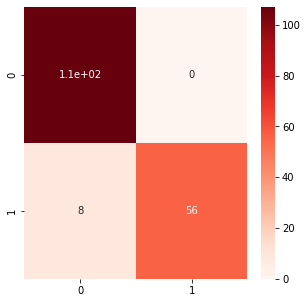

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, knn.predict(x_test))
fig, ax = plt.subplots(figsize=(5, 5))

import seaborn as sns
plot = sns.heatmap(cm,annot=True,  cmap='Reds', fmt='.2g')


<a class="anchor" id="4."></a> 
# Support Vector Machine (SVM) Classification

### 1. Comment the code below
> We will turn the diagnosis column values (M and B) into binary values 1, 0 respectively. 
> We will affect the new values to an array "y".
> Then we will drop the diagnosis column from the dataset and affect the resulting frame to the variable "x".
>All x's column will be normalized. 


In [25]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 2.  Use the same splitted data as before and use SVC model to compyte the new score

- Expected output:
```python
>>> print accuracy of svm algo:  0.9649122807017544
```

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape
#y_train.shape
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
classifier=svm.SVC()
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

ValueError: The number of classes has to be greater than one; got 1 class

### 3. Plot the confusion matrix
- Expected output:

![confusion-matrix](../data/confusion-matrix-svm.png)

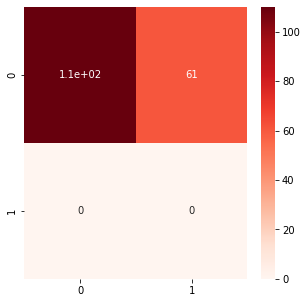

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, prediction)
fig, ax = plt.subplots(figsize=(5, 5))

import seaborn as sns
plot = sns.heatmap(cm,annot=True,  cmap='Reds', fmt='.2g')

# Clustering
<a class="anchor" id="5."></a> 
# K-Means Clustering

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

### 1. Concatenating arrays:
    - x1, x2, x3 to create x array
    - y1, y2, y3 to create y array

In [366]:
x=np.concatenate((x1,x2,x3))
y=np.concatenate((y1,y2,y3))
print(x,y)

[30.20085088 29.18864964 22.5247585  ... 52.20647633 59.13083364
 48.01671362] [24.23578824 31.66644359 25.40827753 ... 10.74337346 13.91451558
 15.22319026]


### 2. Create new dataframe using x and y arrays

- Expected output:
```python
>>>           x          y
>>> 0  31.156168  31.733629
>>> 1  23.429376  35.245182
>>> 2  18.648253  28.094688
>>> 3  31.002996  18.067875
>>> 4  20.030422  26.872852
```

In [367]:
df=pd.DataFrame({'x':x,'y':y})
print(df.isnull().sum())
print(df.drop_duplicates(inplace=True))
df

x    0
y    0
dtype: int64
None


,x,y
0,30.200851,24.235788
1,29.188650,31.666444
2,22.524759,25.408278
3,29.673019,19.503042
4,33.788906,21.884292
...,...,...
2995,62.895759,11.548179
2996,50.190536,22.687915
2997,52.206476,10.743373
2998,59.130834,13.914516


### 3. Plot the data

- Expected output:

![kmeans](../data/kmeans-assignment1.png)

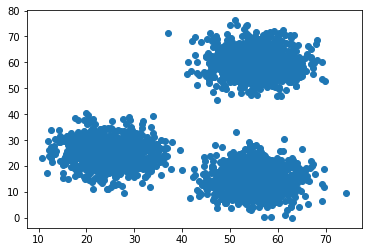

In [386]:
plt.scatter(df['x'].values,df['y'].values)
plt.show()

### 4. Using KMeans compute the WCSS for k=1,...k=15 and plot the it
- Expected output:

![kmeans](../data/kmeans-assignment2.png)    

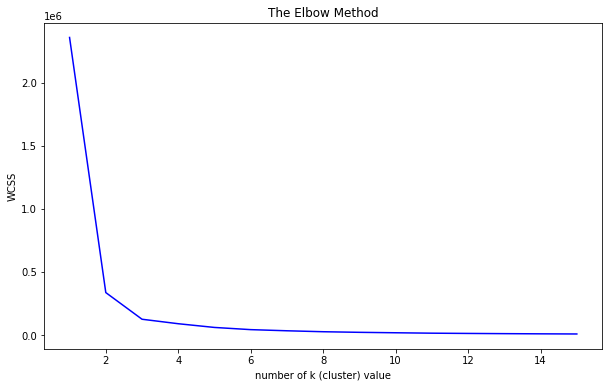

In [387]:
X_input= np.array(x+y).reshape(-1,1)
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, random_state=0)#, init = 'k-means++')
    kmeans.fit(X_input)
    WCSS.append(kmeans.inertia_)
import seaborn as sns
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
plt.plot(range(1, 16), WCSS,color='blue')
plt.title('The Elbow Method')
plt.xlabel('number of k (cluster) value')
ticks_y= ticker.FuncFormatter(lambda x,  pos: '{0:g}'.format(x/scale_y))
plt.ylabel('WCSS')
plt.show()

### 5. Using k=3 predict the data clusters
- Expected output:
![kmeans](../data/kmeans-assignment3.png)    

In [436]:
#We select 3 as the optimized (minimum/elbow) k parameter 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_input)
u_labels = np.unique(y_kmeans)
centroids = kmeans.cluster_centers_
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_input[y_kmeans == i , 0] , X_input[y_kmeans  == i , 1] , label = i)
plt.legend()
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1


<a class="anchor" id="6."></a> 
# Principal Component Analysis (PCA)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
# %%
iris = load_iris()

feature_names = iris.feature_names
y = iris.target

data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

x = iris.data
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   sinif              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sinif  
0      0  
1      0

In [3]:
#%% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.9776852063187949


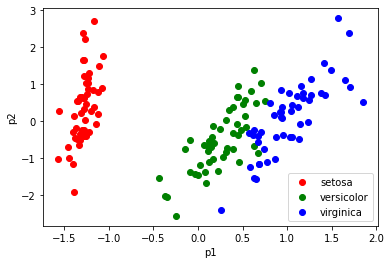

In [4]:
#%% 2D
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(data.p1[data.sinif == each],data.p2[data.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.savefig("../data/pca.png")

plt.show()